In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

## 19~23년 구별 소득수준
월 평균 소득인지 봐야할듯.?

In [14]:
income_df = pd.read_csv('서울시_자치구별_근로소득수.csv', encoding='cp949', index_col = 0)
income_df = income_df.rename_axis(mapper='소득수준(만 원)',axis=1)
income_df = income_df.rename_axis(mapper='자치구',axis=0)
income_df.info()
income_df = income_df.applymap(lambda x:x/10000)
income_df = income_df.applymap(lambda x: round(x))
income_df

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2019    25 non-null     int64
 1   2020    25 non-null     int64
 2   2021    25 non-null     int64
 3   2022    25 non-null     int64
dtypes: int64(4)
memory usage: 1000.0+ bytes


C:\Users\qooqp\AppData\Local\Temp\ipykernel_1508\3086711163.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income_df = income_df.applymap(lambda x:x/10000)
C:\Users\qooqp\AppData\Local\Temp\ipykernel_1508\3086711163.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income_df = income_df.applymap(lambda x: round(x))


소득수준(만 원),2019,2020,2021,2022
자치구,,,,
강남구,1493,1575,1748,1902
강동구,745,787,849,909
강북구,308,311,327,353
강서구,918,929,996,1085
관악구,687,696,755,833
광진구,550,563,612,663
구로구,597,608,650,714
금천구,297,310,339,368
노원구,721,736,778,827


## 19~22년 연도별 소득수준 그래프

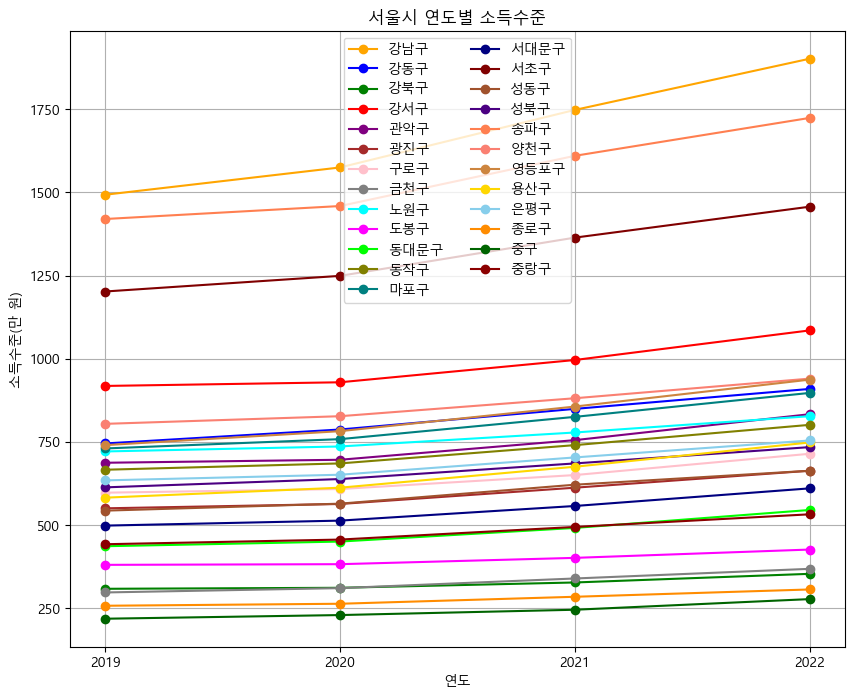

In [19]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0

plt.figure(figsize=(10, 8))
for index, row in income_df.iterrows():
    plt.plot(income_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('서울시 연도별 소득수준')
plt.xlabel('연도')
plt.ylabel('소득수준(만 원)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()

## 19~22년 5개구 연도별 소득수준

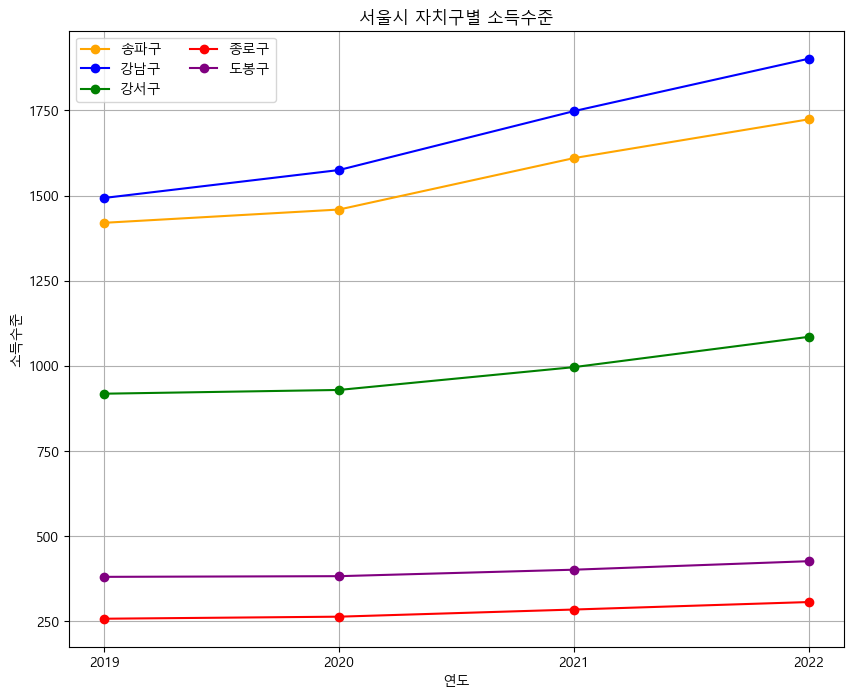

In [18]:
target_income_df = income_df.loc[['송파구', '강남구', '강서구', '종로구', '도봉구']]
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))
for index, row in target_income_df.iterrows():
    plt.plot(target_income_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('서울시 자치구별 소득수준')
plt.xlabel('연도')
plt.ylabel('소득수준(만 원)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()

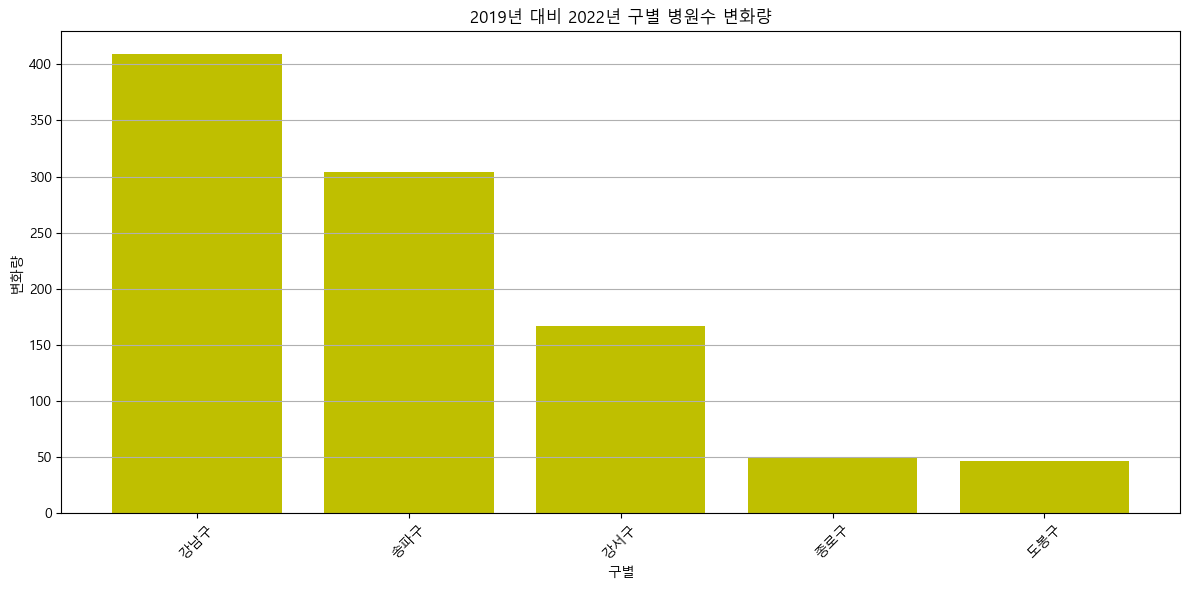

In [20]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 구별 소득수준 변화량')
    plt.xlabel('구별')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

delta_graph(target_income_df)